Domain – Chemical Industry
focus – Classify chemical
Business challenge/requirement
FuPont is a leading chemical company across the globe. The Company is on a CSR (Corporate Social Responsibility) mission. It wants to identify biodegradable products based on a study of the relationships between chemical structure and biodegradation of molecules.
You as ML expert have to create a ML model to classify the chemical structure as 'Ready BioDegradable' – RB vs 'Not Ready Biodegradable' – NRB
Key issues
Data has lots of attributes and classification could be tricky
Considerations
NONE
Data volume
- Approx 1055 records – file bio-degradabale-data.csv
Fields in Data
• Details in Module-9-Ada-Boost.ipynb notebook
Additional information
- NA
Business benefits
Research can lead FuPont to create truly unique Biodegradable packaging material. This could lead to massive profits in future

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [35]:
dfbdd = pd.read_csv('bio-degradabale-data.csv',header='infer', sep=';')

In [36]:
dfbdd.head()

,3.919,2.6909,0,0.1,0.2,0.3,0.4,31.4,2,0.5,...,0.19,0.20,0.21,2.949,1.591,0.22,7.253,0.23,0.24,RB
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,RB


In [37]:
dfbdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 42 columns):
3.919     1054 non-null float64
2.6909    1054 non-null float64
0         1054 non-null int64
0.1       1054 non-null int64
0.2       1054 non-null int64
0.3       1054 non-null int64
0.4       1054 non-null int64
31.4      1054 non-null float64
2         1054 non-null int64
0.5       1054 non-null int64
0.6       1054 non-null int64
0.7       1054 non-null float64
3.106     1054 non-null float64
2.55      1054 non-null float64
9.002     1054 non-null float64
0.8       1054 non-null int64
0.96      1054 non-null float64
1.142     1054 non-null float64
0.9       1054 non-null int64
0.10      1054 non-null int64
0.11      1054 non-null int64
1.201     1054 non-null float64
0.12      1054 non-null int64
0.13      1054 non-null int64
0.14      1054 non-null int64
0.15      1054 non-null int64
1.932     1054 non-null float64
0.011     1054 non-null float64
0.16      1054 non-null int64

In [38]:
dfbdd.RB.unique()

array(['RB', 'NRB'], dtype=object)

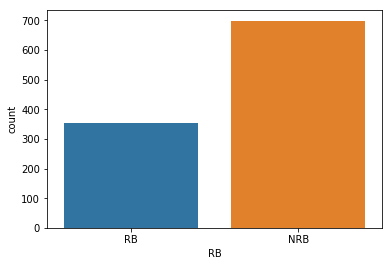

In [39]:
sns.countplot(dfbdd.RB)

In [40]:
dfbdd['RB'] = dfbdd['RB'].map({'RB':1,'NRB':0})

In [41]:
dfbdd['RB'] = dfbdd['RB'].astype('bool')

In [42]:
dfbdd['RB'].unique()

array([ True, False])

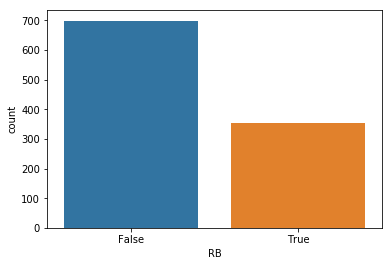

In [43]:
sns.countplot(dfbdd.RB)

In [44]:
X = dfbdd.drop('RB', axis=1)
y = dfbdd.RB

In [45]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.25)

In [46]:
train_X.shape

(790, 41)

In [47]:
test_X.shape

(264, 41)

In [48]:
regModel = LogisticRegression(random_state=5)

In [50]:
regModel.fit(train_X, train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
prediction = regModel.predict(test_X)

In [52]:
accuracy_score(prediction, test_Y)

0.8787878787878788

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtmodel = DecisionTreeClassifier(random_state= 5)

In [55]:
dtmodel.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [56]:
dtprediction = dtmodel.predict(test_X)

In [57]:
accuracy_score(dtprediction, test_Y)

0.7651515151515151

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfmodel = RandomForestClassifier(random_state=5)

In [61]:
rfmodel.fit(train_X, train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [62]:
rfprediction = rfmodel.predict(test_X)

In [63]:
accuracy_score(rfprediction, test_Y)

0.8446969696969697

In [66]:
from sklearn.model_selection import cross_val_score

In [71]:
cross_val_score(regModel,X,y, cv= 5, scoring='accuracy').mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8501015572105619

In [70]:
cross_val_score(dtmodel,X,y, cv= 5, scoring='accuracy').mean()

0.8055156849469645

In [72]:
cross_val_score(rfmodel,X,y, cv= 5, scoring='accuracy').mean()

0.8453847889866847